**1.load dataset:**

Load the heart disease dataset and handle missing value and convert columns to numeric types.

 Standardize the features for use in semi supervised learning algorithms.

In [8]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Sondos Ghonim\Downloads\heart_disease.csv')
print(data.head())


   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  


**2.handle missing values.**

In [9]:
data.replace('?', pd.NA, inplace=True)
data = data.apply(pd.to_numeric)
data.fillna(data.mean(), inplace=True)



**3.standarize the data:**

In [10]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


label management **masking labels**

Mask 50% of the labels in the dataset to simulate unlabeled data.

 This will help train the semi supervised learning algorithms

In [11]:
import numpy as np

labeled_ratio = 0.5

y_masked = np.copy(y)
num_labeled = int(labeled_ratio * len(y))

labeled_indices = np.random.choice(len(y), num_labeled, replace=False)
y_masked[:] = -1  # Set all labels to -1 (unlabeled)
y_masked[labeled_indices] = y[labeled_indices]  # Set the selected labels back to their original values


**Model training semi supervised leaning algo**apply label spreading

Train a Label Spreading modelwh uses both labeled and unlabeled data to predict heart disease. 

Make predictions on the test data and prepare for evaluation

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_masked, y_test = train_test_split(X_scaled, y_masked, test_size=0.2, random_state=42)
label_spread = LabelSpreading(kernel='knn', alpha=0.2)
label_spread.fit(X_train, y_train_masked)
y_pred = label_spread.predict(X_test)


apply label propagation

 Train a Label Propagation model another semi supervised technique that spreads labels from labeled points to unlabeled points. 
 
 Make predictions on the test data and prepare for evaluation.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation

X_train, X_test, y_train_masked, y_test = train_test_split(X_scaled, y_masked, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train_masked: {y_train_masked.shape}")

label_prop = LabelPropagation(kernel='knn')
label_prop.fit(X_train, y_train_masked)
y_pred_prop = label_prop.predict(X_test)


Shape of X_train: (241, 13)
Shape of y_train_masked: (241,)


**apply  SVM**

Train an SVM model using only the labeled data for comparison with the semi supervised approaches. 

Make predictions on the test set and prepare for evaluation.

In [22]:
from sklearn.svm import SVC

X_train, X_test, y_train_masked, y_test = train_test_split(X_scaled, y_masked, test_size=0.2, random_state=42)
labeled_train_indices = np.where(y_train_masked != -1)[0]  
labeled_X_train = X_train[labeled_train_indices]  
labeled_y_train = y_train_masked[labeled_train_indices] 
svm_model = SVC(kernel='linear')

svm_model.fit(labeled_X_train, labeled_y_train)

y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.47      0.94      0.63        18
           1       0.07      0.20      0.11         5
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         0

    accuracy                           0.31        61
   macro avg       0.17      0.23      0.18        61
weighted avg       0.18      0.31      0.22        61



c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

**evaluate model performance**

Evaluate all models **Label Spreading, Label Propagation, and SVM** using classification metrics like accuracy, precision, recall, and F1 score. 


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print("Label Spreading Classification Report:")
print(classification_report(y_test, y_pred))
print("\nLabel Propagation Classification Report:")
print(classification_report(y_test, y_pred_prop))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Label Spreading Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.41      0.94      0.58        18
           1       0.00      0.00      0.00         5
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         6

    accuracy                           0.30        61
   macro avg       0.12      0.24      0.16        61
weighted avg       0.14      0.30      0.18        61


Label Propagation Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.41      0.94      0.58        18
           1       0.07      0.20      0.11         5
           2       0.17      0.25      0.20         4
           3       0.00      0.00      0.00         6

    accuracy                           0.31        61
   macro avg       0.13      0.28      0.18       

c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sondos Ghonim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

**Confusion matrix:**

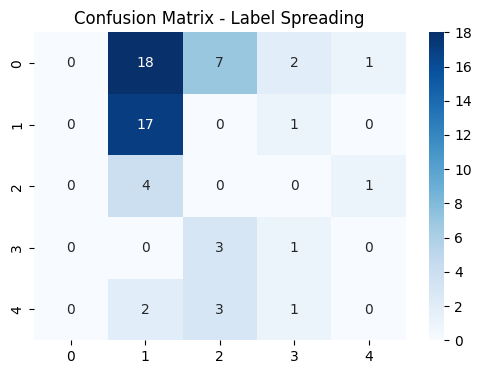

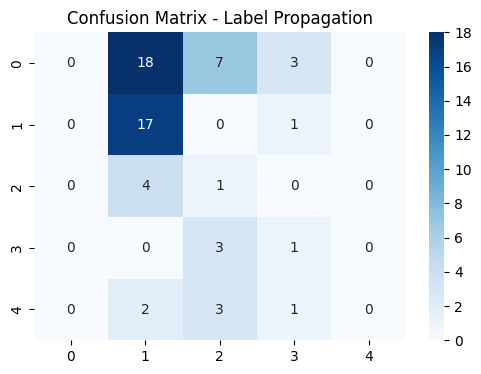

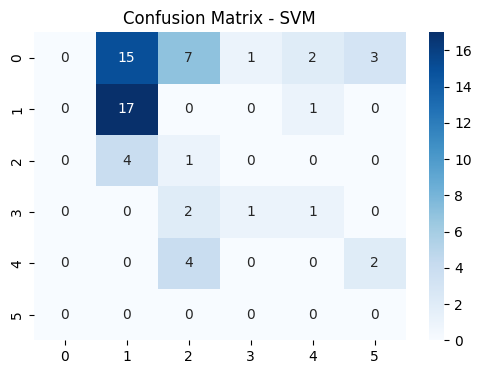

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_label_spread = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_label_spread, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Label Spreading')
plt.show()

cm_label_prop = confusion_matrix(y_test, y_pred_prop)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_label_prop, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Label Propagation')
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()
